In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Datasets/Language Detection.csv")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [3]:
df.shape

(10337, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [5]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [6]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


У нас 66 дупликатов. Удалим их

In [7]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [8]:
df.shape

(10271, 2)

In [9]:
df["Language"].nunique()

17

В нашем датасете 17 различных языков

In [10]:
df["Language"].value_counts()  # Сколько строк имеет каждый язык

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: count, dtype: int64

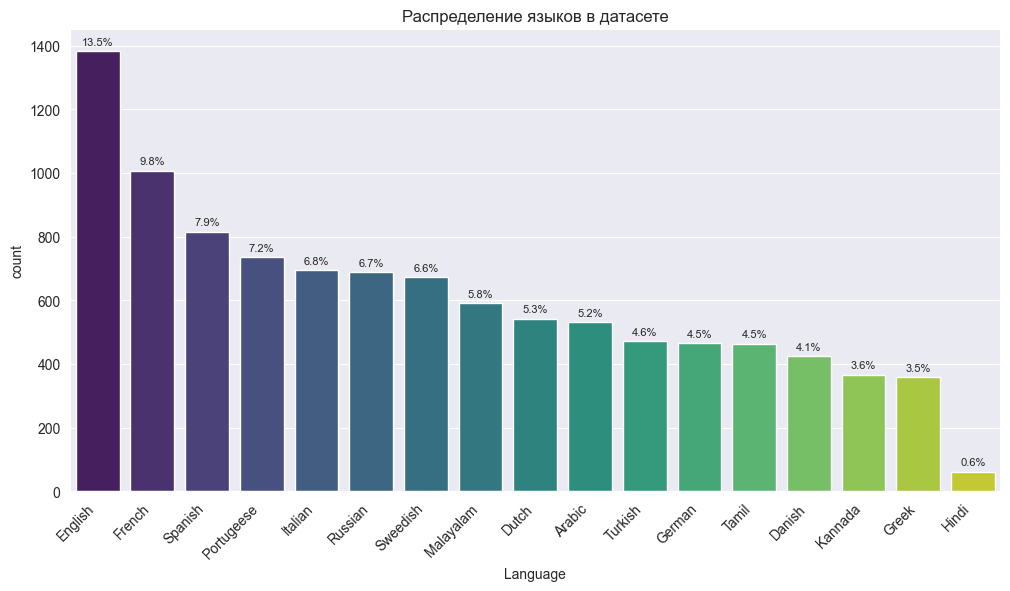

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Language', data=df, palette='viridis', order=df['Language'].value_counts().index)
plt.title('Распределение языков в датасете')
plt.xticks(rotation=45, ha='right')

# Добавим процентную аннотацию
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20
    ax.text(x, y, percentage, ha='center', fontsize=8)
plt.show()

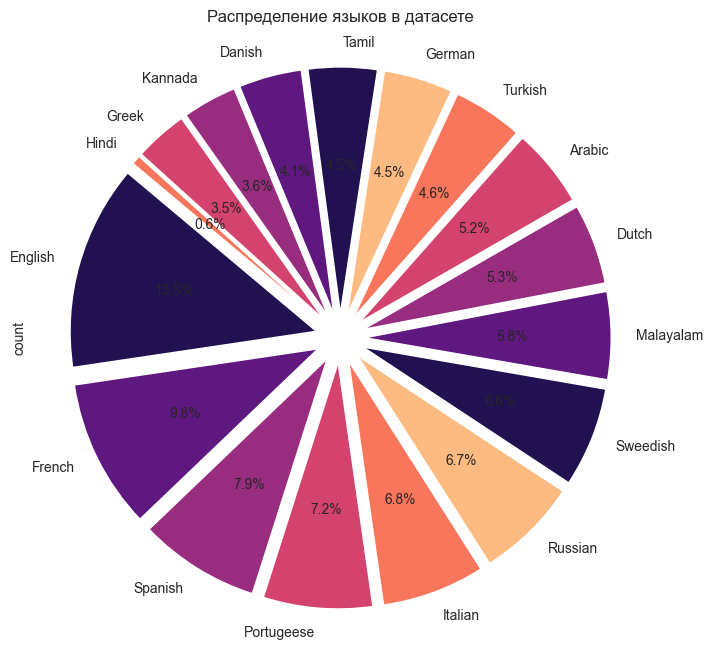

In [13]:
plt.figure(figsize=(8, 8))
df['Language'].value_counts().loc[df['Language'].value_counts().index].plot.pie(autopct='%1.1f%%', startangle=140,
                                                                                colors=sns.color_palette('magma'),
                                                                                explode=[0.1] * len(
                                                                                    df['Language'].unique()))
plt.title('Распределение языков в датасете')
plt.show()

In [14]:
data = df.copy()
data['Cleaned_Text'] = ""
data

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [15]:
import re


#Это функция для предобработки данных
def clean_function(Text):
    # Удалим символы и числа
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    # Переведем текст в нижний регистр
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # Удалим ссылки
    Text = re.sub('RT|cc', ' ', Text)  # Удалим RT и cc
    Text = re.sub('#\S+', '', Text)  # Удалим хэштеги
    Text = re.sub('@\S+', '  ', Text)  # Удалим обращения к аккаунтам
    Text = re.sub('\s+', ' ', Text)  # Удалим лишние пробелы
    return Text

In [16]:
data['Cleaned_Text'] = data['Text'].apply(lambda x: clean_function(x))
data

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [17]:
X = data["Cleaned_Text"]
y = data["Language"]

In [19]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Model: Логистическая регрессия
Accuracy: 0.9509345794392523
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       146
           1       0.95      0.91      0.93       103
           2       0.99      0.90      0.94       133
           3       0.97      0.99      0.98       361
           4       1.00      0.95      0.97       255
           5       1.00      0.95      0.97       114
           6       1.00      0.95      0.97        79
           7       1.00      0.75      0.86        12
           8       0.99      0.92      0.95       159
           9       1.00      0.95      0.98        86
          10       1.00      0.99      1.00       161
          11       0.99      0.94      0.97       178
          12       0.63      1.00      0.77       150
          13       0.94      0.97      0.96       205
          14       0.98      0.93      0.96       182
          15       1.00      0.96      0.98       11

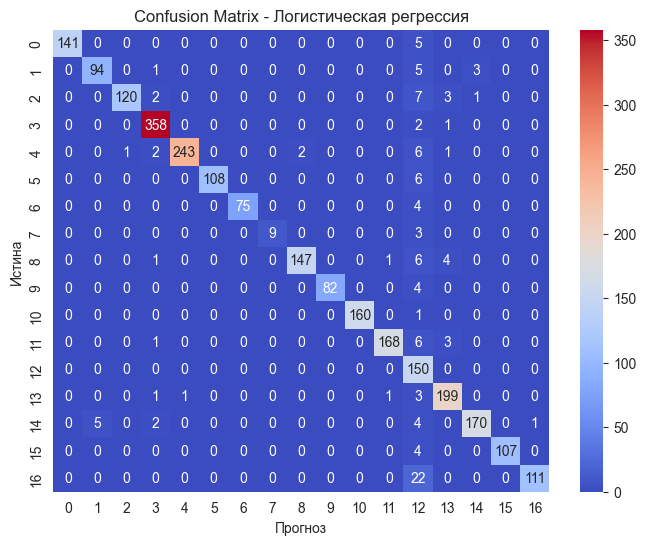


Model: K-ближайших соседей
Accuracy: 0.4322429906542056
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71       146
           1       0.85      0.49      0.62       103
           2       0.98      0.49      0.65       133
           3       0.87      0.19      0.31       361
           4       0.49      0.32      0.39       255
           5       0.94      0.43      0.59       114
           6       1.00      0.58      0.74        79
           7       1.00      0.33      0.50        12
           8       0.91      0.18      0.30       159
           9       1.00      0.55      0.71        86
          10       1.00      0.58      0.74       161
          11       0.96      0.14      0.25       178
          12       1.00      0.53      0.69       150
          13       0.13      0.97      0.23       205
          14       0.98      0.25      0.39       182
          15       1.00      0.64      0.78       111
 

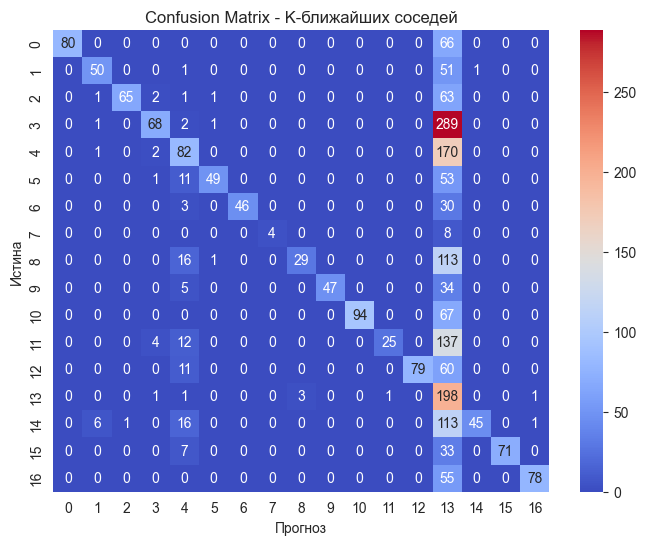


Model: Случайный лес
Accuracy: 0.9322429906542056
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       146
           1       0.93      0.89      0.91       103
           2       0.97      0.88      0.92       133
           3       0.97      0.97      0.97       361
           4       0.97      0.92      0.94       255
           5       0.95      0.92      0.94       114
           6       1.00      0.95      0.97        79
           7       1.00      0.92      0.96        12
           8       0.95      0.91      0.93       159
           9       1.00      0.95      0.98        86
          10       1.00      0.96      0.98       161
          11       0.96      0.93      0.95       178
          12       0.60      1.00      0.75       150
          13       0.91      0.92      0.92       205
          14       0.96      0.93      0.94       182
          15       1.00      0.95      0.98       111
       

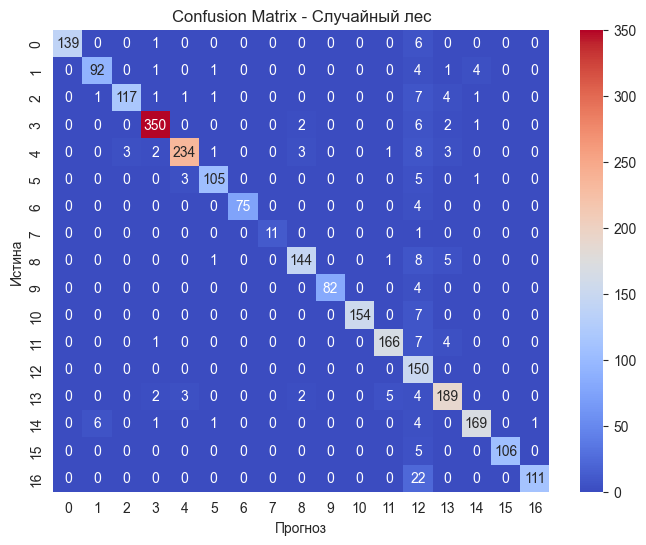



Model: Наивный Байес
Accuracy: 0.9602803738317757
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       146
           1       0.99      0.94      0.97       103
           2       1.00      0.92      0.96       133
           3       0.81      1.00      0.90       361
           4       0.98      0.98      0.98       255
           5       1.00      0.96      0.98       114
           6       1.00      0.95      0.97        79
           7       1.00      0.75      0.86        12
           8       1.00      0.94      0.97       159
           9       1.00      0.95      0.98        86
          10       1.00      0.99      1.00       161
          11       0.99      0.96      0.97       178
          12       1.00      0.97      0.98       150
          13       0.97      0.97      0.97       205
          14       0.98      0.98      0.98       182
          15       1.00      0.97      0.99       111
      

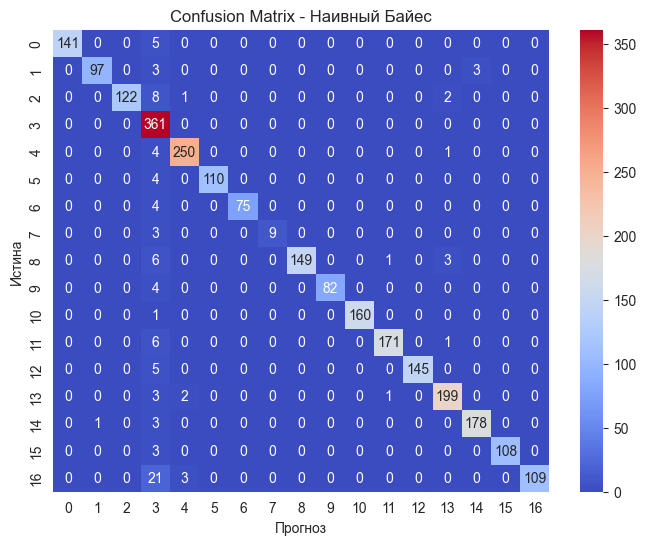

In [22]:
models = {
    'Логистическая регрессия': LogisticRegression(),
    'K-ближайших соседей': KNeighborsClassifier(),
    'Случайный лес': RandomForestClassifier(),
    'Наивный Байес': MultinomialNB()
}

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{classification_report_str}')

    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Прогноз')
    plt.ylabel('Истина')
    plt.show()

    print('\n' + '=' * 50 + '\n')

In [23]:
def predict(text):
    lang = model.predict(tfidf_vectorizer.transform([text]))
    language = encoder.inverse_transform(lang)[0]
    print('Язык: ', language)

In [24]:
# Английский
predict("LANGUAGE DETECTION MODEL CHECK")
# Французский
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Русский
predict("ПРОВЕРКА МОДЕЛИ ДЛЯ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Испанский
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")

Язык:  English
Язык:  French
Язык:  Russian
Язык:  Spanish
